In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy.stats as stats
from scipy.stats import zscore
from statsmodels.formula.api import ols
import statsmodels as sm
import statsmodels.api as sm
import sklearn.preprocessing as preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
from sklearn.metrics import mean_squared_error
pd.set_option('display.max_columns', None)

/Users/brittanyfowle/opt/anaconda3/lib/python3.7/site-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


In [2]:
data = pd.read_csv('HepCDF.csv', index_col=0)

In [3]:
data.head()

,Age,Gender,BMI,Fever,Nausea/Vomting,Headache,Diarrhea,Fatigue & generalized bone ache,Jaundice,Epigastric pain,WBC,RBC,HGB,Plat,AST 1,ALT 1,ALT4,ALT 12,ALT 24,ALT 36,ALT 48,ALT after 24 w,RNA Base,RNA 4,RNA 12,RNA EOT,RNA EF,Baseline histological Grading,Transplant
0,56,0,35,0,0,0,0,0,0,0,7425,4248807,14,112132,99,84,52,109,81,84,84,34,655330,634536,288194,386384,387088,13,0
1,46,0,29,0,0,0,0,0,0,0,12101,4429425,10,129367,91,123,95,75,113,57,123,44,40620,538635,637056,336804,31085,4,0
2,57,0,33,0,0,0,0,0,0,0,4178,4621191,12,151522,113,49,95,107,116,84,84,34,571148,661346,406373,735945,558829,4,1
3,49,0,33,0,0,0,0,0,0,0,6490,4794631,10,146457,43,64,109,80,88,48,77,33,1041941,449939,585688,744463,582301,10,0
4,59,0,32,0,0,0,0,0,0,0,3661,4606375,11,187684,99,104,67,48,120,94,90,30,660410,738756,3731527,338946,242861,11,0


# Decision Tree

In [4]:
X_data=pd.DataFrame(data, columns=['Age', 'Gender', 'BMI', 'Fever', 'Nausea/Vomting', 'Headache',
       'Diarrhea', 'Fatigue & generalized bone ache', 'Jaundice',
       'Epigastric pain', 'WBC', 'RBC', 'HGB', 'Plat', 'AST 1', 'ALT 1',
       'ALT4', 'ALT 12', 'ALT 24', 'ALT 36', 'ALT 48', 'ALT after 24 w',
       'RNA Base', 'RNA 4', 'RNA 12', 'RNA EOT', 'RNA EF',
       'Baseline histological Grading'])
y_data=data.Transplant

In [5]:
y_data = y_data.astype('int')

In [6]:
X_train_data,X_test_data,y_train_data,y_test_data = train_test_split(X_data, y_data, test_size = 0.2, random_state = 42)

In [7]:
from sklearn.tree import DecisionTreeClassifier
ctree=DecisionTreeClassifier(max_depth = 2)
ctree.fit(X_train_data,y_train_data)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

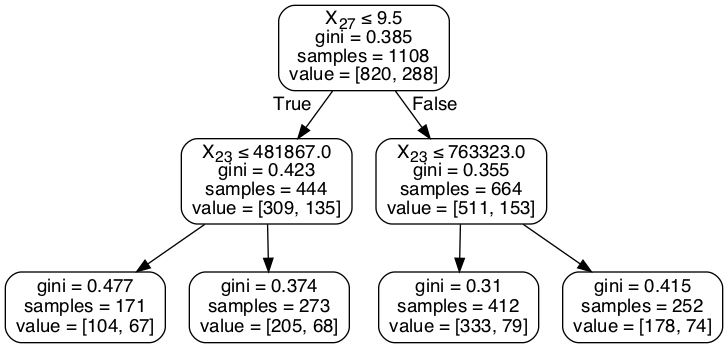

In [8]:
dot_data = StringIO()
export_graphviz(ctree, out_file=dot_data,  
                rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [9]:
clasPred = ctree.predict(X_test_data)

In [10]:
#interpretation: ginis are high (close to 0.5)
#visualize this:
# https://www.kaggle.com/arthurtok/decision-boundaries-visualised-via-python-plotly
##the value row tells us how many of the observations that were sorted into that node fall into each of the categoriesb

In [11]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test_data, clasPred)

0.7328519855595668

[0.7364920237722865, 0.7350064792886188, 0.7328480569581602, 0.7176409431461043, 0.7052910466657729, 0.686616247374771, 0.6801049346857918, 0.6541838330577773, 0.6483194810611138]


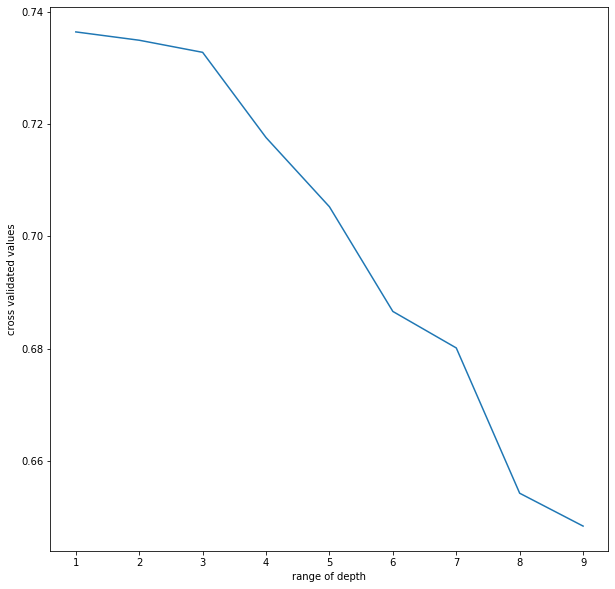

In [12]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(ctree, X_data, y_data, cv = 10)
score.mean()
depth_range = range(1,10)
val = []
for depth in depth_range:
    ctree = DecisionTreeClassifier(max_depth = depth)
    depth_score = cross_val_score(ctree, X_data, y_data, cv = 10)
    val.append(depth_score.mean())
print(val)
plt.figure(figsize = (10,10))
plt.plot(depth_range, val)
plt.xlabel('range of depth')
plt.ylabel('cross validated values')
plt.show()

In [ ]:
#add confusion matrix

# Bagged Trees

In [ ]:
#boostrap samples with replacement from training dataset to prevent overfitting
#Tree has low bias and high variance

In [13]:
import pandas as pd
import numpy as np
np.random.seed(0)
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier

In [14]:
transplant = data['Transplant']
data = data.drop('Transplant', axis = 1)

In [15]:
transplant = transplant.astype('int')

In [16]:
data.head()

,Age,Gender,BMI,Fever,Nausea/Vomting,Headache,Diarrhea,Fatigue & generalized bone ache,Jaundice,Epigastric pain,WBC,RBC,HGB,Plat,AST 1,ALT 1,ALT4,ALT 12,ALT 24,ALT 36,ALT 48,ALT after 24 w,RNA Base,RNA 4,RNA 12,RNA EOT,RNA EF,Baseline histological Grading
0,56,0,35,0,0,0,0,0,0,0,7425,4248807,14,112132,99,84,52,109,81,84,84,34,655330,634536,288194,386384,387088,13
1,46,0,29,0,0,0,0,0,0,0,12101,4429425,10,129367,91,123,95,75,113,57,123,44,40620,538635,637056,336804,31085,4
2,57,0,33,0,0,0,0,0,0,0,4178,4621191,12,151522,113,49,95,107,116,84,84,34,571148,661346,406373,735945,558829,4
3,49,0,33,0,0,0,0,0,0,0,6490,4794631,10,146457,43,64,109,80,88,48,77,33,1041941,449939,585688,744463,582301,10
4,59,0,32,0,0,0,0,0,0,0,3661,4606375,11,187684,99,104,67,48,120,94,90,30,660410,738756,3731527,338946,242861,11


In [17]:
data = pd.get_dummies(data)
data.tail()

,Age,Gender,BMI,Fever,Nausea/Vomting,Headache,Diarrhea,Fatigue & generalized bone ache,Jaundice,Epigastric pain,WBC,RBC,HGB,Plat,AST 1,ALT 1,ALT4,ALT 12,ALT 24,ALT 36,ALT 48,ALT after 24 w,RNA Base,RNA 4,RNA 12,RNA EOT,RNA EF,Baseline histological Grading
1380,44,0,29,0,0,0,0,0,0,0,7044,4957174,15,202520,122,59,78,106,127,63,44,45,387795,55938,406373,386384,387088,15
1381,55,0,34,0,0,0,0,0,0,0,6207,4636951,10,115776,128,102,65,99,108,97,64,41,481378,152961,393339,73574,236273,10
1382,42,0,26,0,0,0,0,0,0,0,4913,4122038,14,128354,61,93,123,61,116,87,39,24,612664,572756,806109,343719,160457,6
1383,52,0,29,0,0,0,0,0,0,0,7257,4241990,10,205908,70,97,104,74,47,48,81,43,139872,76161,515730,2460,696074,15
1384,55,0,26,0,0,0,0,0,0,0,11832,4059176,14,136615,51,126,39,68,115,64,71,34,1190577,628730,406373,386384,387088,13


In [18]:
data= pd.get_dummies(data, columns = ['Baseline histological Grading'])

In [19]:
data.head()

,Age,Gender,BMI,Fever,Nausea/Vomting,Headache,Diarrhea,Fatigue & generalized bone ache,Jaundice,Epigastric pain,WBC,RBC,HGB,Plat,AST 1,ALT 1,ALT4,ALT 12,ALT 24,ALT 36,ALT 48,ALT after 24 w,RNA Base,RNA 4,RNA 12,RNA EOT,RNA EF,Baseline histological Grading_3,Baseline histological Grading_4,Baseline histological Grading_6,Baseline histological Grading_7,Baseline histological Grading_8,Baseline histological Grading_9,Baseline histological Grading_10,Baseline histological Grading_11,Baseline histological Grading_12,Baseline histological Grading_13,Baseline histological Grading_14,Baseline histological Grading_15,Baseline histological Grading_16
0,56,0,35,0,0,0,0,0,0,0,7425,4248807,14,112132,99,84,52,109,81,84,84,34,655330,634536,288194,386384,387088,0,0,0,0,0,0,0,0,0,1,0,0,0
1,46,0,29,0,0,0,0,0,0,0,12101,4429425,10,129367,91,123,95,75,113,57,123,44,40620,538635,637056,336804,31085,0,1,0,0,0,0,0,0,0,0,0,0,0
2,57,0,33,0,0,0,0,0,0,0,4178,4621191,12,151522,113,49,95,107,116,84,84,34,571148,661346,406373,735945,558829,0,1,0,0,0,0,0,0,0,0,0,0,0
3,49,0,33,0,0,0,0,0,0,0,6490,4794631,10,146457,43,64,109,80,88,48,77,33,1041941,449939,585688,744463,582301,0,0,0,0,0,0,1,0,0,0,0,0,0
4,59,0,32,0,0,0,0,0,0,0,3661,4606375,11,187684,99,104,67,48,120,94,90,30,660410,738756,3731527,338946,242861,0,0,0,0,0,0,0,1,0,0,0,0,0


In [20]:
data_train, data_test, transplant_train, transplant_test = train_test_split(data, transplant, 
                                                                    test_size = 0.25, random_state=123)

In [21]:
# Instantiate and fit a DecisionTreeClassifier
tree_clf = DecisionTreeClassifier(criterion='gini', max_depth=3) 
tree_clf.fit(data_train, transplant_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [22]:
# Feature importance
tree_clf.feature_importances_

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.15473674, 0.        , 0.        , 0.        , 0.18152304,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.17507092, 0.        , 0.        , 0.22035356, 0.        ,
       0.11517015, 0.15314559, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ])

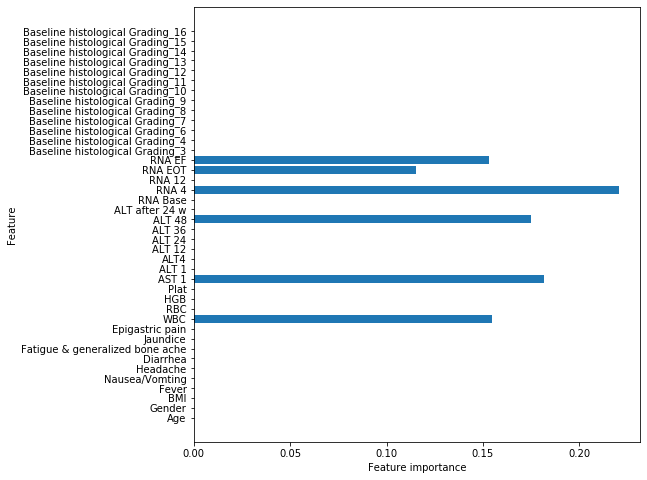

In [23]:
#train feature importance
def plot_feature_importances(model):
    n_features = data_train.shape[1]
    plt.figure(figsize=(8,8))
    plt.barh(range(n_features), model.feature_importances_, align='center') 
    plt.yticks(np.arange(n_features), data_train.columns.values) 
    plt.xlabel('Feature importance')
    plt.ylabel('Feature')

plot_feature_importances(tree_clf)

In [24]:
# Test set predictions for bootstrapped 
pred = tree_clf.predict(data_test)

# Confusion matrix and classification report
print(confusion_matrix(transplant_test, pred))
print(classification_report(transplant_test, pred))

[[252   3]
 [ 91   1]]
              precision    recall  f1-score   support

           0       0.73      0.99      0.84       255
           1       0.25      0.01      0.02        92

    accuracy                           0.73       347
   macro avg       0.49      0.50      0.43       347
weighted avg       0.61      0.73      0.62       347



In [25]:
print("Testing Accuracy for Decision Tree Classifier: {:.4}%".format(accuracy_score(transplant_test, pred) * 100))

Testing Accuracy for Decision Tree Classifier: 72.91%


In [26]:
# Instantiate a BaggingClassifier (changed maxdepth to 3 from 5)
bagged_tree =  BaggingClassifier(DecisionTreeClassifier(criterion='gini', max_depth=3), 
                                 n_estimators=20)

In [27]:
# Fit to the training data
bagged_tree.fit(data_train, transplant_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None,
                                                        criterion='gini',
                                                        max_depth=3,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                                        presort=False,
                                                        random_state=None,
                                                        splitter='best'),
       

In [28]:
#check accuracy score
# Training accuracy score
bagged_tree.score(data_train, transplant_train)

0.7398843930635838

In [29]:
# Test accuracy score
bagged_tree.score(data_test, transplant_test)

0.7348703170028819

# Random Forests Model

In [30]:
forest = RandomForestClassifier(n_estimators=100, max_depth= 3)
forest.fit(data_train, transplant_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=3, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [31]:
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=3, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=3, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [32]:
# Training accuracy score
forest.score(data_train, transplant_train)

0.7398843930635838

In [33]:
# Test accuracy score
forest.score(data_test, transplant_test)

0.7348703170028819

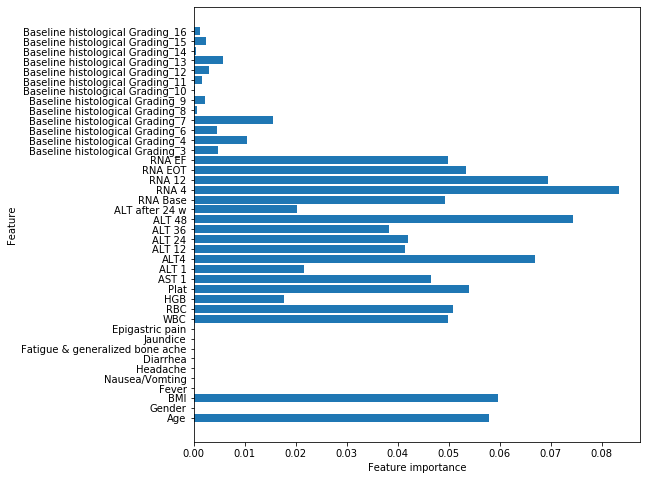

In [34]:
plot_feature_importances(forest)

In [35]:
#create forest with small trees (max depth = 2)
# Instantiate and fit a RandomForestClassifier
forest_2 = RandomForestClassifier(n_estimators = 5, max_features= 10, max_depth= 2)
forest_2.fit(data_train, transplant_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=2, max_features=10, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=5,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [36]:
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=2, max_features=10, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=5,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=2, max_features=10, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=5,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [37]:
#adjust max_features (use fewer). store in .estimators_ attribute
#get the first tree and store it
# First tree from forest_2
rf_tree_1 = forest_2.estimators_[0]

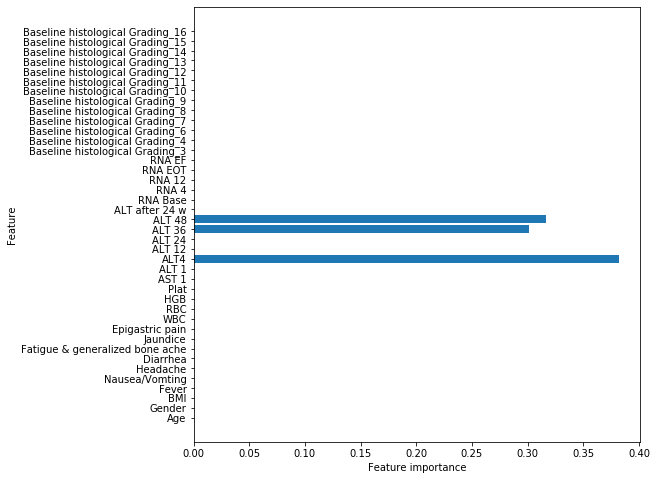

In [38]:
#these are the features given to the tree during subspace sampling
# Feature importance of tree 1 from forest 2
plot_feature_importances(rf_tree_1)

In [39]:
# Second tree from forest_2
rf_tree_2 = forest_2.estimators_[1]

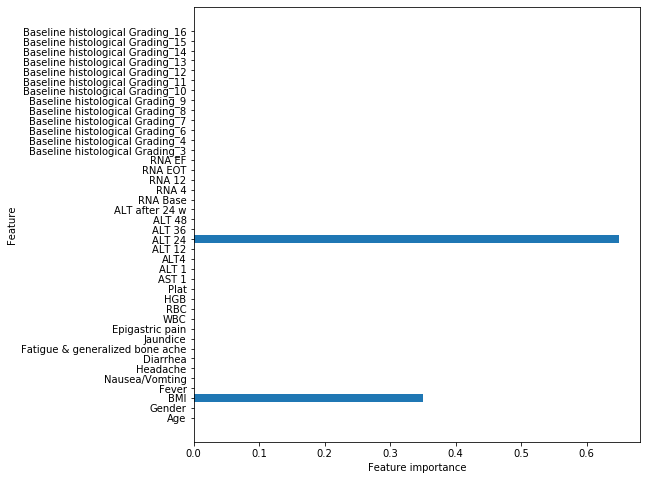

In [40]:
# Feature importance
plot_feature_importances(rf_tree_2)

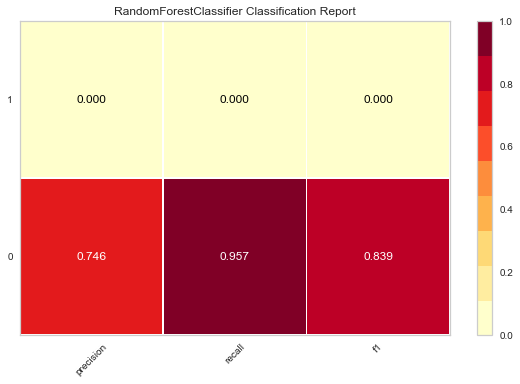

In [41]:
from sklearn.ensemble import RandomForestClassifier
from yellowbrick.classifier import classification_report


X = data
y = transplant
visualizer = classification_report(
    RandomForestClassifier(n_estimators=20), X, y
)